In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data=pd.read_csv('/home/hammadali08/Vidoes/CSV file/House_data.csv')
data

,bedrooms,bathrooms,sqft+AF8-living,sqft+AF8-lot,floors,waterfront,view,condition,sqft+AF8-above,sqft+AF8-base,yr+AF8-built,Renovated,price
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05
4596,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05
4597,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05
4598,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05


<Axes: >

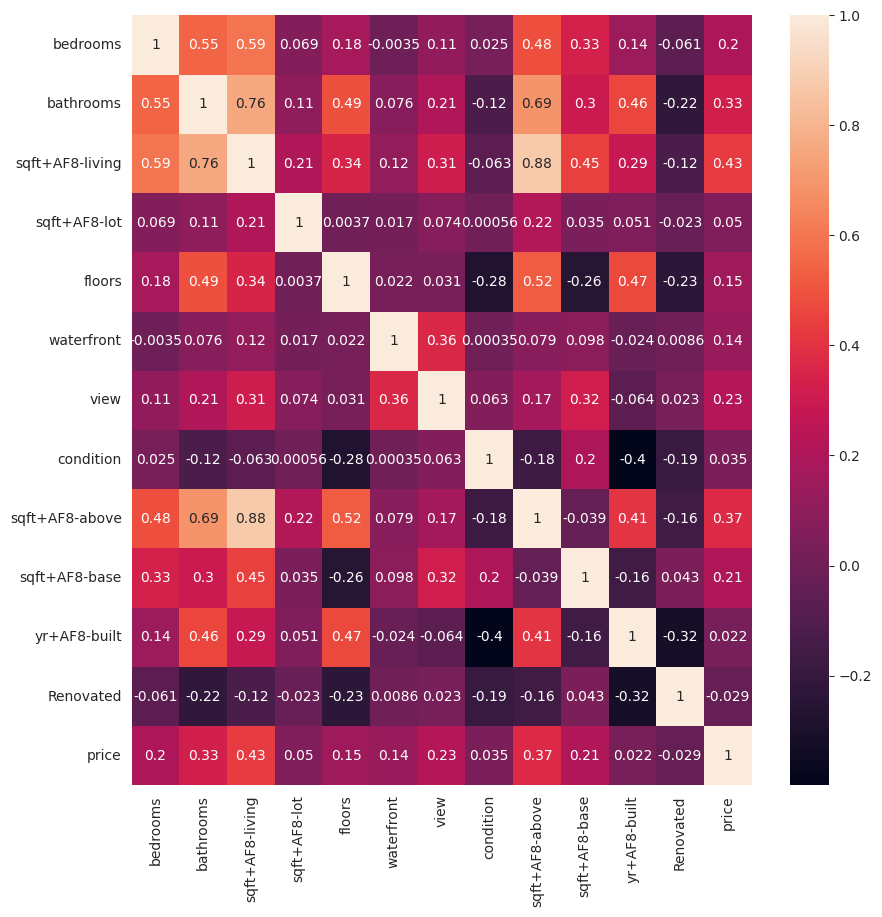

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [8]:
x=data.iloc[:,:-1]
y=data['price']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)
x

,bedrooms,bathrooms,sqft+AF8-living,sqft+AF8-lot,floors,waterfront,view,condition,sqft+AF8-above,sqft+AF8-base,yr+AF8-built,Renovated
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121
4596,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755
4597,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693
4598,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [13]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [16]:
mns=mean_squared_error(y_test,lr.predict(x_test))
mas=mean_absolute_error(y_test,lr.predict(x_test))
sr=np.sqrt(mns)
mns,mas,sr

(84910483732.20332, 166409.60572691515, np.float64(291394.03516922466))

In [17]:
lr.score(x_test,y_test)

0.5338948028607414

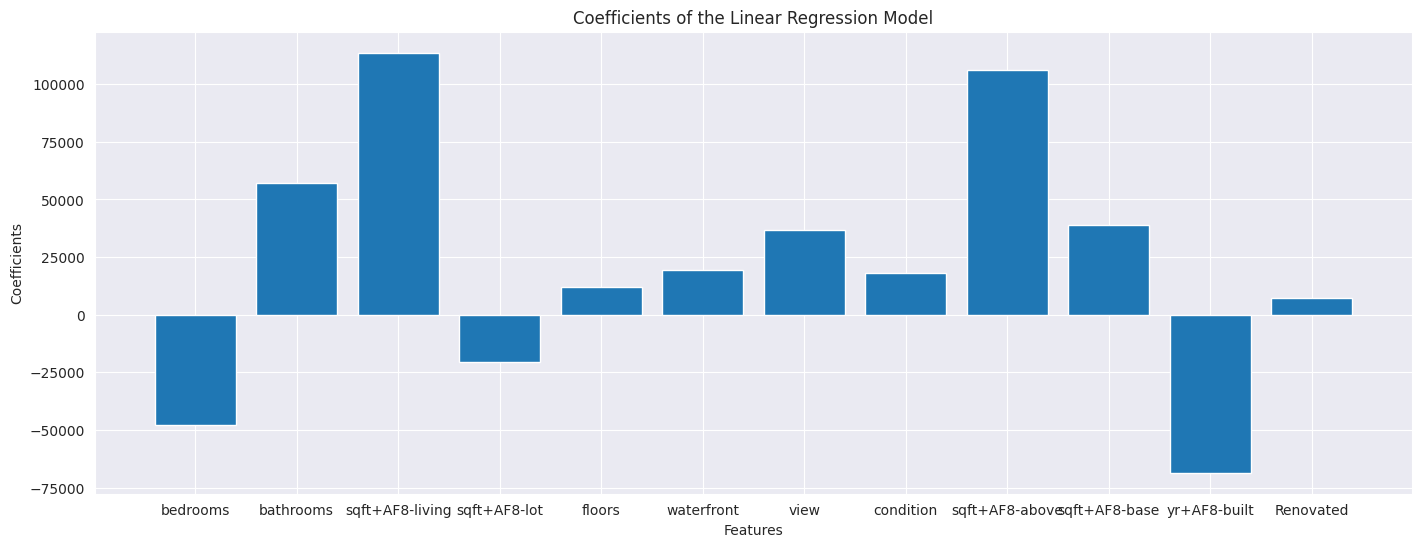

In [18]:
plt.figure(figsize=(17,6))
plt.bar(x.columns,lr.coef_)
plt.title('Coefficients of the Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

# Lasso

In [19]:
la=Lasso(alpha=1.0)
la.fit(x_train,y_train)

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.492e+13, tolerance: 1.294e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [20]:
la.score(x_test,y_test)

0.5338956802992895

In [21]:
mns1=mean_squared_error(y_test,la.predict(x_test))
mas2=mean_absolute_error(y_test,la.predict(x_test))
sr1=np.sqrt(mns1)
mns,mas,sr

(84910483732.20332, 166409.60572691515, np.float64(291394.03516922466))

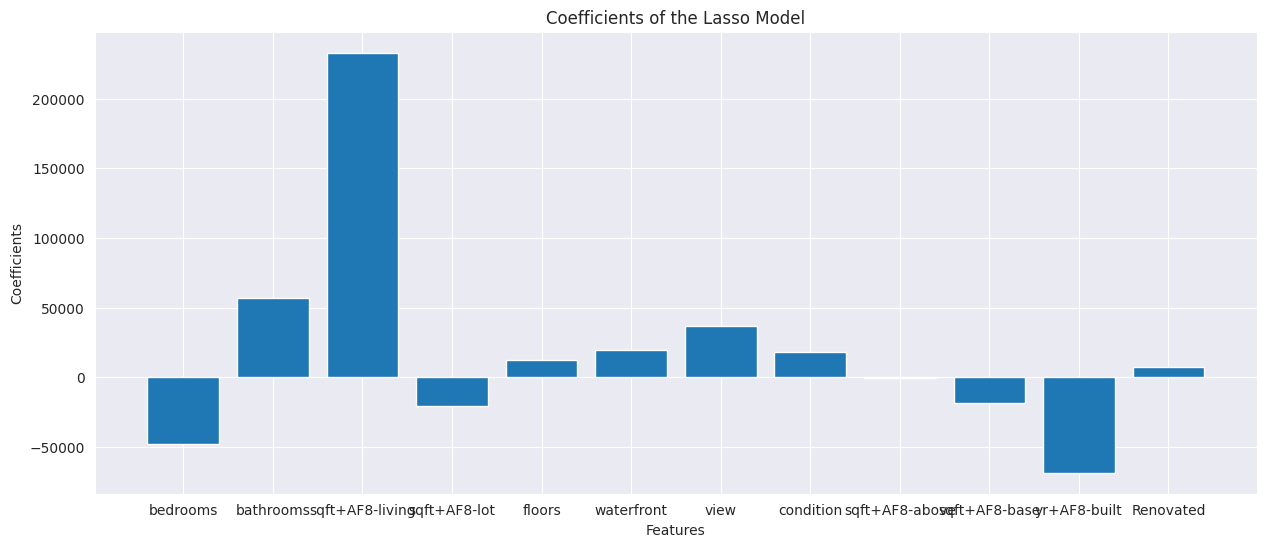

In [22]:
plt.figure(figsize=(15,6))
plt.bar(x.columns,la.coef_)
plt.title('Coefficients of the Lasso Model')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

 # Ridge

In [23]:
rg=Ridge(alpha=10)
rg.fit(x_train,y_train)

Ridge(alpha=10)

In [24]:
rg.score(x_test,y_test)

0.5335056317915818

In [25]:
mns3=mean_squared_error(y_test,rg.predict(x_test))
mas3=mean_absolute_error(y_test,rg.predict(x_test))
sr3=np.sqrt(mns3)
mns,mas,sr

(84910483732.20332, 166409.60572691515, np.float64(291394.03516922466))

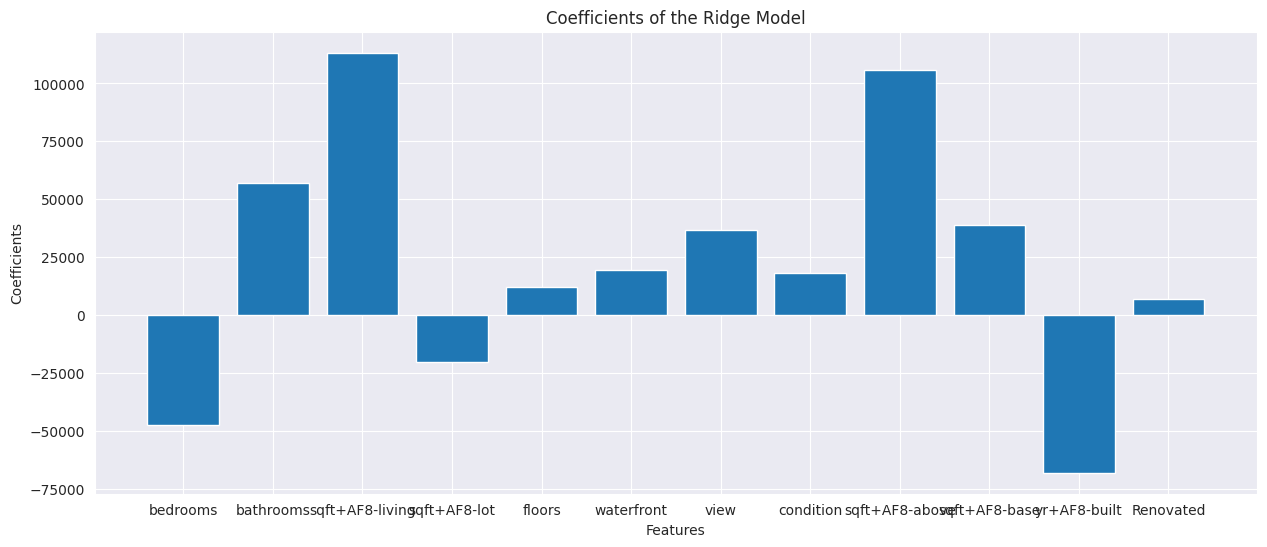

In [26]:
plt.figure(figsize=(15,6))
plt.bar(x.columns,rg.coef_)
plt.title('Coefficients of the Ridge Model')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [27]:
df=pd.DataFrame({'Columns Name':x.columns,'Regression':lr.coef_,'Lasso':la.coef_,'Ridge':rg.coef_})

In [28]:
df

,Columns Name,Regression,Lasso,Ridge
0,bedrooms,-47956.063566,-47954.660243,-47425.757444
1,bathrooms,57082.968188,57076.367385,56936.734781
2,sqft+AF8-living,113614.950173,232970.214537,113260.197358
3,sqft+AF8-lot,-20662.956096,-20661.878697,-20508.561977
4,floors,12068.485182,12068.793129,12128.680533
5,waterfront,19451.538520,19450.731624,19450.648678
6,view,36623.390014,36623.042082,36692.663104
7,condition,18175.337083,18173.646110,18194.045548
8,sqft+AF8-above,106039.330606,-792.372029,105667.397259
9,sqft+AF8-base,38805.084930,-18704.706183,38759.772960
